# Road Analytics 

In [1]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense,Dropout
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [2]:
import pandas as pd

In [3]:
data = np.loadtxt("dataset_preprocessed/dataset_2.csv",delimiter=",")

In [4]:
data.shape

(2010, 4)

In [5]:
x = data[:,0:-1]
y = data[:,-1]

# Spliting dataset into train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
print(x.shape)
print(y.shape)

(2010, 3)
(2010,)


In [6]:
x.shape[1]

3

In [7]:
print(x_train.shape)
print(x_test.shape)

(1608, 3)
(402, 3)


In [8]:
count=0 
for i in y_train:
    if (i==0) :
        count=count+1
print("0 :",count)
count=0 
for i in y:
    if (i==1) :
        count=count+1
print("1 :",count)
count=0 
for i in y:
    if (i==2) :
        count=count+1
print("2 :",count)

0 : 561
1 : 599
2 : 700


In [9]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [10]:
y_train

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [11]:
y_test

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

# Creating the model

In [89]:
model = Sequential()
model.add(Dense(16,input_dim=x.shape[1],activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(y_train.shape[1],activation='softmax'))

# Compiling and Training the model 

In [90]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [91]:
learning_rate = 0.001

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
epochs = 100
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/100
51/51 [==============================] - 0s 3ms/step - loss: 1.0797 - accuracy: 0.6001 - val_loss: 1.0289 - val_accuracy: 0.7090
Epoch 2/100
51/51 [==============================] - 0s 1ms/step - loss: 0.9376 - accuracy: 0.6729 - val_loss: 0.7868 - val_accuracy: 0.7687
Epoch 3/100
51/51 [==============================] - 0s 1ms/step - loss: 0.7317 - accuracy: 0.7195 - val_loss: 0.5852 - val_accuracy: 0.7861
Epoch 4/100
51/51 [==============================] - 0s 1ms/step - loss: 0.6207 - accuracy: 0.7494 - val_loss: 0.4895 - val_accuracy: 0.8532
Epoch 5/100
51/51 [==============================] - 0s 1ms/step - loss: 0.5743 - accuracy: 0.7581 - val_loss: 0.4582 - val_accuracy: 0.8682
Epoch 6/100
51/51 [==============================] - 0s 1ms/step - loss: 0.5317 - accuracy: 0.7910 - val_loss: 0.4138 - val_accuracy: 0.8756
Epoch 7/100
51/51 [==============================] - 0s 1ms/step - loss: 0.5113 - accuracy: 0.7948 - val_loss: 0.3940 - val_accuracy: 0.8806
Epoch 8/100
5

51/51 [==============================] - 0s 2ms/step - loss: 0.1671 - accuracy: 0.9372 - val_loss: 0.1254 - val_accuracy: 0.9453
Epoch 59/100
51/51 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.9335 - val_loss: 0.1198 - val_accuracy: 0.9577
Epoch 60/100
51/51 [==============================] - 0s 1ms/step - loss: 0.1653 - accuracy: 0.9341 - val_loss: 0.1274 - val_accuracy: 0.9428
Epoch 61/100
51/51 [==============================] - 0s 1ms/step - loss: 0.1659 - accuracy: 0.9378 - val_loss: 0.1291 - val_accuracy: 0.9502
Epoch 62/100
51/51 [==============================] - 0s 1ms/step - loss: 0.1654 - accuracy: 0.9353 - val_loss: 0.1168 - val_accuracy: 0.9478
Epoch 63/100
51/51 [==============================] - 0s 1ms/step - loss: 0.1555 - accuracy: 0.9428 - val_loss: 0.1166 - val_accuracy: 0.9552
Epoch 64/100
51/51 [==============================] - 0s 1ms/step - loss: 0.1558 - accuracy: 0.9415 - val_loss: 0.1213 - val_accuracy: 0.9552
Epoch 65/100
51/51 

# Plotting graphs for accuracy 

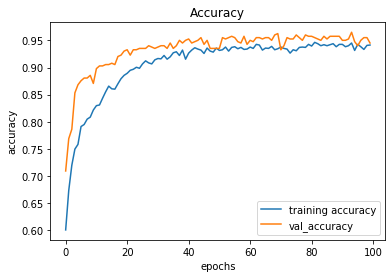

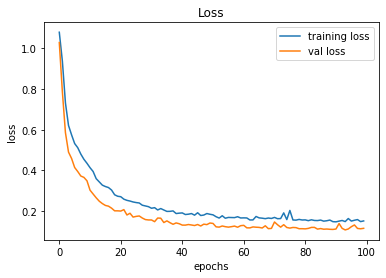

In [92]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Loading Model

In [93]:
model.save('road_analytics_model_test_2.h5')

In [94]:
from keras.models import load_model

model = load_model('road_analytics_model_test_2.h5')

In [95]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 16)                64        
_________________________________________________________________
dropout_68 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_69 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_87 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_70 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_88 (Dense)             (None, 32)              

In [96]:
label=np.array(y_train)
print(label.shape)

(1608, 3)


In [97]:
samples = np.array([[0.0010733,0.0041571,0.00015108]])      
print(samples)
prediction = model.predict_classes(samples)
print(prediction)

[[0.0010733  0.0041571  0.00015108]]
[0]


In [98]:
samples = np.array([[0.015798,0.015052,0.033555]])      
print(samples)
prediction = model.predict_classes(samples)
print(prediction)

[[0.015798 0.015052 0.033555]]
[1]


In [99]:
samples = np.array([[0.16983,0.13365,0.085775]])      
print(samples)
prediction = model.predict_classes(samples)
print(prediction)

[[0.16983  0.13365  0.085775]]
[2]
